## Task 1:  Dependencies


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from dotenv import load_dotenv

load_dotenv(dotenv_path="../.env")

True

In [4]:
import os
import sys
import getpass
import pandas as pd
import copy
import time

# Add the project root to Python path so we can import from src
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.core.core_functions import check_if_env_var_is_set

2025-08-07 00:26:07,314 - src.core.core_functions - INFO - 🔑 OPENAI_API_KEY is present
2025-08-07 00:26:07,315 - src.core.core_functions - INFO - 🔑 COHERE_API_KEY is present


In [5]:
check_if_env_var_is_set("OPENAI_API_KEY", "OpenAI API key")
check_if_env_var_is_set("COHERE_API_KEY", "Cohere API key")
check_if_env_var_is_set("TAVILY_API_KEY", "TAVILY API key")

2025-08-07 00:26:13,290 - src.core.core_functions - INFO - 🔑 OPENAI_API_KEY is present
2025-08-07 00:26:13,294 - src.core.core_functions - INFO - 🔑 COHERE_API_KEY is present
2025-08-07 00:26:13,299 - src.core.core_functions - INFO - 🔑 TAVILY_API_KEY is present


In [6]:
import importlib

In [7]:
import src.core.core_functions
importlib.reload(src.core.core_functions)

import src.evaluation.evaluation_helpers
importlib.reload(src.evaluation.evaluation_helpers)

from src.core.core_functions import load_and_prepare_pdf_loan_docs, load_and_prepare_csv_loan_docs
from src.evaluation.evaluation_helpers import generate_golden_master
from src.agents.build_graph_agent import get_graph_agent

2025-08-07 00:26:13,389 - src.core.core_functions - INFO - 🔑 OPENAI_API_KEY is present
2025-08-07 00:26:13,392 - src.core.core_functions - INFO - 🔑 COHERE_API_KEY is present
/home/AIE7-Cert-Challenge/src/agents/build_graph_agent.py:23: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily_tool = TavilySearchResults(max_results=5)


In [8]:
import src.evaluation.ragas_metrics
importlib.reload(src.evaluation.ragas_metrics)
from src.evaluation.ragas_metrics import extract_ragas_metrics

## Task 2: Environment Variables

We'll want to set both our OpenAI API key and our LangSmith environment variables.

In [9]:
from uuid import uuid4

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = f"AIE7 - Certification Challenge"
check_if_env_var_is_set("LANGCHAIN_API_KEY", "LangSmith API Key")
os.environ['DATA_FOLDER'] = '../data'

2025-08-07 00:26:38,439 - src.core.core_functions - INFO - 🔑 LANGCHAIN_API_KEY is present


In [16]:
import src.core.core_functions
importlib.reload(src.core.core_functions)

import src.agents.build_graph_agent
importlib.reload(src.agents.build_graph_agent)

import src.agents.llm_tools_for_toolbelt
importlib.reload(src.agents.llm_tools_for_toolbelt)

from src.agents.build_graph_agent import get_graph_agent
from src.agents.llm_tools_for_toolbelt import ask_naive_llm_tool, ask_contextual_compression_llm_tool, ask_multi_query_llm_tool, ask_parent_document_llm_tool

2025-08-07 00:41:57,544 - src.core.core_functions - INFO - 🔑 OPENAI_API_KEY is present
2025-08-07 00:41:57,546 - src.core.core_functions - INFO - 🔑 COHERE_API_KEY is present


In [23]:
from src.core.graph_rag_functions import (
    naive_graph,
    contextual_compression_graph,
    multi_query_graph,
    parent_document_graph,
)

In [12]:
import src.evaluation.tool_calls_parser_for_eval
importlib.reload(src.evaluation.tool_calls_parser_for_eval)
from src.evaluation.tool_calls_parser_for_eval import parse_logs, print_formatted_results, extract_contexts_for_eval, parse_langchain_messages

In [15]:
from langchain_core.messages import HumanMessage

# inputs = {"messages" : [HumanMessage(content="Who is the current captain of the Winnipeg Jets?")]}
# inputs = {"messages" : [HumanMessage(content="What concerns does the borrower have regarding Nelnet's communication about their student loan issuer?")]}
inputs = {"messages" : [HumanMessage(content="What is the issue with Aidvantage in the borrower's complaint?")]}

async for chunk in naive_graph_agent.astream(inputs, stream_mode="updates"):
    for node, values in chunk.items():
        print(f"Receiving update from node: '{node}'")
        if node == "action":
          print(f"Tool Used: {values['messages'][0].name}")
          print_formatted_results(parse_logs(str(values["messages"])))
        print("\n")
        print(values["messages"])
        print("\n\n")

2025-08-04 21:02:50,870 - src.agents.build_graph_agent - INFO - 🧠 LLM processing 1 messages
2025-08-04 21:02:51,874 - src.agents.build_graph_agent - INFO - 📝 LLM generated response with 0 characters
2025-08-04 21:02:51,879 - src.agents.build_graph_agent - INFO - 🔧 Agent requesting 1 tool calls
2025-08-04 21:02:51,890 - src.agents.llm_tools_for_toolbelt - INFO - 🔍 [Naive Tool] Processing question: What is the issue with Aidvantage in the borrower's complaint?...
2025-08-04 21:02:51,896 - src.core.graph_rag_functions - INFO - 🔍 [Naive] Retrieving docs for: What is the issue with Aidvantage in the borrower's complaint?...


Receiving update from node: 'agent'


[AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_fAm5GlelsCEALq8Hb6wAwDAk', 'function': {'arguments': '{"question":"What is the issue with Aidvantage in the borrower\'s complaint?"}', 'name': 'ask_naive_llm_tool'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 454, 'total_tokens': 485, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_38343a2f8f', 'id': 'chatcmpl-C0wcVZh1gvUXM6NyukQloqgUkGX6v', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--8f90faf9-6645-4451-b9d6-96997cf14bf9-0', tool_calls=[{'name': 'ask_naive_llm_tool', 'args': {'question': "What is the issue with Aidvantage in the borrower's compl

2025-08-04 21:02:55,648 - src.core.graph_rag_functions - INFO - 📚 [Naive] Retrieved 5 documents with relevance scores
2025-08-04 21:02:55,652 - src.core.graph_rag_functions - INFO - 🤖 [Generate Function] Executing LLM call for question: What is the issue with Aidvantage in the borrower'...
2025-08-04 21:02:55,654 - src.core.graph_rag_functions - INFO - 🤖 Generating response using 5 context documents


________________________________________________________________________________
[Memory] Calling src.core.graph_rag_functions.invoke_llm...
invoke_llm([ HumanMessage(content="\nYou are a helpful assistant who answers questions based on provided context. You must only use the provided context, and cannot use your own knowledge.\n\n### Question\nWhat is the issue with Aidvantage in the borrower's complaint?\n\n### Context\nCustomer Issue: Dealing with your lender or servicer\nProduct: Student loan\nComplaint Details: This is my formal complaint against Aidvantage and the U.S. Department of Education regarding their failure to validate an alleged federal student loan debt.\n\nDespite multiple disputes and certified mailings, Aidvantage has failed to provide legally sufficient documentation. They submitted a generic master promissory note ( XX...)


2025-08-04 21:02:56,682 - src.core.graph_rag_functions - INFO - ✅ Generated response with 374 characters
2025-08-04 21:02:56,685 - src.agents.llm_tools_for_toolbelt - INFO - ✅ [Naive Tool] Generated response with 5 contexts
2025-08-04 21:02:56,692 - src.evaluation.tool_calls_parser_for_eval - INFO - === PARSING RESULTS ===
2025-08-04 21:02:56,694 - src.evaluation.tool_calls_parser_for_eval - INFO - Tool calls: 0
2025-08-04 21:02:56,695 - src.evaluation.tool_calls_parser_for_eval - INFO - Tool results: 1
2025-08-04 21:02:56,696 - src.evaluation.tool_calls_parser_for_eval - INFO - Tools used: ['ask_naive_llm_tool']
2025-08-04 21:02:56,698 - src.evaluation.tool_calls_parser_for_eval - INFO - === TOOL CALLS ===
2025-08-04 21:02:56,699 - src.evaluation.tool_calls_parser_for_eval - INFO - === TOOL RESULTS ===
2025-08-04 21:02:56,700 - src.evaluation.tool_calls_parser_for_eval - INFO - 1. ask_naive_llm_tool -> {\...
2025-08-04 21:02:56,701 - src.evaluation.tool_calls_parser_for_eval - INFO - 

_______________________________________________________invoke_llm - 1.0s, 0.0min
Receiving update from node: 'action'
Tool Used: ask_naive_llm_tool


[ToolMessage(content='{\'messages\': [HumanMessage(content=\'{\\n  "issue": "Aidvantage failed to provide legally sufficient documentation to validate the alleged federal student loan debt. They submitted a generic master promissory note with no signature, no IP address, no e-signature audit trail, and no proof of borrower authentication or consent, which does not meet legal standards under the ESIGN Act, FCRA, or the Privacy Act."\\n}\', additional_kwargs={}, response_metadata={})], \'context\': [Document(metadata={\'source\': \'../data/complaints.csv\', \'row\': 779, \'Date received\': \'05/08/25\', \'Product\': \'Student loan\', \'Sub-product\': \'Federal student loan servicing\', \'Issue\': \'Dealing with your lender or servicer\', \'Sub-issue\': \'Received bad information about your loan\', \'Consumer complaint narrative\': \'This is

2025-08-04 21:02:58,205 - src.agents.build_graph_agent - INFO - 📝 LLM generated response with 427 characters
2025-08-04 21:02:58,211 - src.agents.build_graph_agent - INFO - ✅ Agent conversation complete, no more tool calls needed


Receiving update from node: 'agent'


[AIMessage(content="The issue with Aidvantage in the borrower's complaint is that they failed to provide legally sufficient documentation to validate the alleged federal student loan debt. Specifically, they submitted a generic master promissory note with no signature, no IP address, no e-signature audit trail, and no proof of borrower authentication or consent, which does not meet legal standards under the ESIGN Act, FCRA, or the Privacy Act.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 85, 'prompt_tokens': 3525, 'total_tokens': 3610, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_38343a2f8f', 'id': 'chatcmpl-C0wcbndoAzVu6tdQxAjTBWRBOTArp', 'service_tier': 'default', 'finish_r

2025-08-04 21:49:38,793 - langsmith.client - WARNING - Failed to send compressed multipart ingest: Connection error caused failure to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. Please confirm your internet connection. ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'api.smith.langchain.com\', port=443): Max retries exceeded with url: /runs/multipart (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7fa58868fb10>: Failed to resolve \'api.smith.langchain.com\' ([Errno -2] Name or service not known)"))'))
Content-Length: 2606
API Key: lsv2_********************************************7ftrace=d547d423-6e69-45c4-b309-ba0d342fdd4d,id=d547d423-6e69-45c4-b309-ba0d342fdd4d; trace=d547d423-6e69-45c4-b309-ba0d342fdd4d,id=bf23c9cd-d1e1-4a97-be7b-69b2c0e7b5d1; trace=d547d423-6e69-45c4-b309-ba0d342fdd4d,id=ef834e78-9a86-4dc7-b219-26a46a68c7eb
2025-08-04 21:49:48,807 - langsmith.client - WARNING - Failed to send compressed multipart ing

In [16]:
# inputs = {"messages" : [HumanMessage(content='')]}
naive_graph_agent = get_graph_agent([ask_naive_llm_tool])
response = naive_graph_agent.invoke(inputs)

evaluation_contexts = extract_contexts_for_eval(response["messages"])
print(f"✅ Extracted {len(evaluation_contexts)} contexts for evaluation")
parsed_data = parse_langchain_messages(response["messages"])
print_formatted_results(parsed_data)

eval_sample = {
    "user_input": inputs["messages"][0].content,
    "response": response["messages"][-1].content,  # Final AI response
    "retrieved_contexts": evaluation_contexts,
    "tools_used": parsed_data['summary']['tools'],
    "num_contexts": len(evaluation_contexts)
}

print(f"\n🎯 EVALUATION SAMPLE:")
print(f"Query: {eval_sample['user_input']}")
print(f"Response: {eval_sample['response'][:200]}...")
print(f"Contexts: {eval_sample['num_contexts']} extracted")
print(f"Tools: {eval_sample['tools_used']}")

2025-08-04 21:02:58,234 - src.agents.build_graph_agent - INFO - 🧠 LLM processing 1 messages
2025-08-04 21:02:58,903 - src.agents.build_graph_agent - INFO - 📝 LLM generated response with 0 characters
2025-08-04 21:02:58,907 - src.agents.build_graph_agent - INFO - 🔧 Agent requesting 1 tool calls
2025-08-04 21:02:58,914 - src.agents.llm_tools_for_toolbelt - INFO - 🔍 [Naive Tool] Processing question: What is the issue with Aidvantage in the borrower's complaint?...
2025-08-04 21:02:58,918 - src.core.graph_rag_functions - INFO - 🔍 [Naive] Retrieving docs for: What is the issue with Aidvantage in the borrower's complaint?...
2025-08-04 21:02:59,366 - src.core.graph_rag_functions - INFO - 📚 [Naive] Retrieved 5 documents with relevance scores
2025-08-04 21:02:59,372 - src.core.graph_rag_functions - INFO - 🤖 [Generate Function] Executing LLM call for question: What is the issue with Aidvantage in the borrower'...
2025-08-04 21:02:59,375 - src.core.graph_rag_functions - INFO - 🤖 Generating respo

✅ Extracted 5 contexts for evaluation

🎯 EVALUATION SAMPLE:
Query: What is the issue with Aidvantage in the borrower's complaint?
Response: The issue with Aidvantage in the borrower's complaint is that they failed to provide legally sufficient documentation to validate the alleged federal student loan debt. Specifically, they submitted a ...
Contexts: 5 extracted
Tools: [None, 'ask_naive_llm_tool']


### Generate Golden master

In [14]:
%%time
student_loan_pdf_docs_dataset = load_and_prepare_pdf_loan_docs()
student_loan_complaint_docs_dataset  = load_and_prepare_csv_loan_docs()
student_loan_docs_dataset = student_loan_pdf_docs_dataset + student_loan_complaint_docs_dataset

2025-08-04 23:28:29,746 - src.core.core_functions - INFO - 📁 Current working directory: /home/AIE7-Cert-Challenge/notebooks
2025-08-04 23:28:29,750 - src.core.core_functions - INFO - 📄 Loading student loan PDFs from: ../data
2025-08-04 23:28:31,078 - src.core.core_functions - INFO - ✅ Loaded 269 PDF documents
2025-08-04 23:28:31,080 - src.core.core_functions - INFO - 📁 Current working directory: /home/AIE7-Cert-Challenge/notebooks
2025-08-04 23:28:31,081 - src.core.core_functions - INFO - 📊 Loading student loan complaints from: ../data/complaints.csv
2025-08-04 23:28:31,388 - src.core.core_functions - INFO - 📋 Original complaint documents count: 825
2025-08-04 23:28:31,393 - src.core.core_functions - INFO - ✅ Filtered complaint documents count: 480


CPU times: user 1.87 s, sys: 18.6 ms, total: 1.88 s
Wall time: 1.9 s


In [15]:
%%time
golden_master_dataset = generate_golden_master(student_loan_docs_dataset)

CPU times: user 320 ms, sys: 51.5 ms, total: 371 ms
Wall time: 369 ms


In [16]:
golden_master_dataset.to_pandas()

,user_input,reference_contexts,reference,synthesizer_name
0,How is the Pell Grant award calculated for stu...,"[non-term (includes clock-hour calendars), or ...",For students in subscription-based academic ca...,single_hop_specifc_query_synthesizer
1,Are veterinary clinical experiences allowed to...,[Inclusion of Clinical Work in a Standard Term...,"Yes, veterinary clinical experiences may be in...",single_hop_specifc_query_synthesizer
2,Whaat are the condishuns under wich a program ...,[Non-Term Characteristics A program that measu...,A program that measures progress in credit-hou...,single_hop_specifc_query_synthesizer
3,so like if a student gettin Pell Grant in a cl...,[both the credit or clock hours and the weeks ...,if a student in a clock-hour or non-term credi...,single_hop_specifc_query_synthesizer
4,how do disbursement timing rules for federal s...,[<1-hop>\n\nboth the credit or clock hours and...,In clock-hour or non-term credit-hour programs...,multi_hop_abstract_query_synthesizer
5,What are the differences in disbursement timin...,[<1-hop>\n\nboth the credit or clock hours and...,In clock-hour or non-term credit-hour programs...,multi_hop_abstract_query_synthesizer
6,How does the disbursement timing for federal s...,[<1-hop>\n\nboth the credit or clock hours and...,In clock-hour or non-term credit-hour programs...,multi_hop_abstract_query_synthesizer
7,How does the disbursement timing for federal s...,[<1-hop>\n\nboth the credit or clock hours and...,In standard clock-hour or non-term credit-hour...,multi_hop_abstract_query_synthesizer
8,How do the examples in Appendix A and Appendix...,[<1-hop>\n\nboth the credit or clock hours and...,The examples in Appendix A illustrate the prin...,multi_hop_specific_query_synthesizer
9,Wut are the disbursment timing rules for Title...,[<1-hop>\n\nDisbursement Timing in Subscriptio...,For the first two subscription periods in a su...,multi_hop_specific_query_synthesizer


In [17]:
from tqdm.notebook import tqdm

import src.evaluation.evaluation_helpers
importlib.reload(src.evaluation.evaluation_helpers)

from src.evaluation.evaluation_helpers import generate_responses_for_golden_dataset, display_dataset_with_metadata, run_ragas_evaluation, record_metrics_from_run

### Synthetic Data Generation using RAGAS using the Golden master (Naive Retriever)

2025-08-07 00:42:35,204 - src.agents.build_graph_agent - INFO - 🤖 Creating graph agent with 1 additional tools
2025-08-07 00:42:35,342 - src.agents.build_graph_agent - INFO - 🔧 Agent toolbelt configured with 5 total tools
2025-08-07 00:42:35,344 - src.agents.build_graph_agent - INFO - ✅ Agent graph compiled and ready


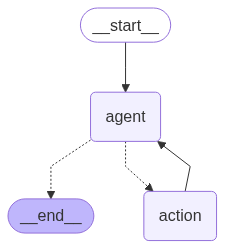

In [18]:
naive_graph_agent = get_graph_agent([ask_naive_llm_tool])
naive_graph_agent

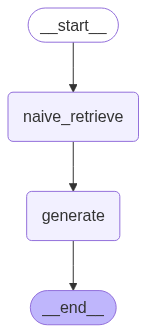

In [24]:
naive_graph

In [30]:
%%time
golden_master_dataset = generate_responses_for_golden_dataset(golden_master_dataset, naive_graph_agent)

  0%|          | 0/12 [00:00<?, ?it/s]

2025-08-04 21:16:08,129 - src.agents.build_graph_agent - INFO - 🧠 LLM processing 1 messages
2025-08-04 21:16:09,113 - src.agents.build_graph_agent - INFO - 📝 LLM generated response with 0 characters
2025-08-04 21:16:09,116 - src.agents.build_graph_agent - INFO - 🔧 Agent requesting 1 tool calls
2025-08-04 21:16:09,125 - src.tools.tavily_tools - INFO - 🔍 [StudentAid Search] Searching for: Pell Grant award calculation for subscription-based academic calendars
2025-08-04 21:16:11,173 - src.tools.tavily_tools - INFO - 📚 [StudentAid Search] Found 3 results
2025-08-04 21:16:11,178 - src.agents.build_graph_agent - INFO - 🧠 LLM processing 3 messages
2025-08-04 21:16:12,922 - src.agents.build_graph_agent - INFO - 📝 LLM generated response with 611 characters
2025-08-04 21:16:12,925 - src.agents.build_graph_agent - INFO - ✅ Agent conversation complete, no more tool calls needed
2025-08-04 21:16:12,934 - src.agents.build_graph_agent - INFO - 🧠 LLM processing 1 messages
2025-08-04 21:16:13,729 - src

________________________________________________________________________________
[Memory] Calling src.core.graph_rag_functions.invoke_llm...
invoke_llm([ HumanMessage(content='\nYou are a helpful assistant who answers questions based on provided context. You must only use the provided context, and cannot use your own knowledge.\n\n### Question\nAre veterinary clinical experiences allowed to be included in standard term periods for financial aid purposes?\n\n### Context\nInclusion of Clinical Work in a Standard Term\nPeriods of medical and education program clinical work which is conducted outside the classroom may not be included in\na standard term, unless all of the following apply:\nAll students in the program must participate in the practicum or clinical experience, and they must be required to\ncomplete the practicum or clinical experi...)


2025-08-04 21:16:17,466 - src.core.graph_rag_functions - INFO - ✅ Generated response with 917 characters
2025-08-04 21:16:17,469 - src.agents.llm_tools_for_toolbelt - INFO - ✅ [Naive Tool] Generated response with 5 contexts
2025-08-04 21:16:17,474 - src.agents.build_graph_agent - INFO - 🧠 LLM processing 3 messages


_______________________________________________________invoke_llm - 2.5s, 0.0min


2025-08-04 21:16:19,580 - src.agents.build_graph_agent - INFO - 📝 LLM generated response with 629 characters
2025-08-04 21:16:19,583 - src.agents.build_graph_agent - INFO - ✅ Agent conversation complete, no more tool calls needed
2025-08-04 21:16:19,596 - src.agents.build_graph_agent - INFO - 🧠 LLM processing 1 messages
2025-08-04 21:16:20,423 - src.agents.build_graph_agent - INFO - 📝 LLM generated response with 0 characters
2025-08-04 21:16:20,426 - src.agents.build_graph_agent - INFO - 🔧 Agent requesting 1 tool calls
2025-08-04 21:16:20,433 - src.agents.llm_tools_for_toolbelt - INFO - 🔍 [Naive Tool] Processing question: What are the conditions under which a program measuring progress in credit-hours is considered to ha...
2025-08-04 21:16:20,506 - src.core.graph_rag_functions - INFO - 🔍 [Naive] Retrieving docs for: What are the conditions under which a program measuring progress in credit-hours is considered to ha...
2025-08-04 21:16:20,897 - src.core.graph_rag_functions - INFO - 📚 [

________________________________________________________________________________
[Memory] Calling src.core.graph_rag_functions.invoke_llm...
invoke_llm([ HumanMessage(content='\nYou are a helpful assistant who answers questions based on provided context. You must only use the provided context, and cannot use your own knowledge.\n\n### Question\nWhat are the conditions under which a program measuring progress in credit-hours is considered to have a non-term calendar?\n\n### Context\nmust include a minimum of nine weeks.\nSemesters, trimesters, or quarters are also considered to be nonstandard terms if academic progress is not measured in\nthe manner normally associated with the type of term. For example, if a program is offered in 15-week semesters but\nmeasures academic progress in quarter credit hours, the semesters would be considered non...)


2025-08-04 21:16:22,968 - src.core.graph_rag_functions - INFO - ✅ Generated response with 992 characters
2025-08-04 21:16:22,971 - src.agents.llm_tools_for_toolbelt - INFO - ✅ [Naive Tool] Generated response with 5 contexts
2025-08-04 21:16:22,978 - src.agents.build_graph_agent - INFO - 🧠 LLM processing 3 messages


_______________________________________________________invoke_llm - 2.1s, 0.0min


2025-08-04 21:16:25,037 - src.agents.build_graph_agent - INFO - 📝 LLM generated response with 723 characters
2025-08-04 21:16:25,040 - src.agents.build_graph_agent - INFO - ✅ Agent conversation complete, no more tool calls needed
2025-08-04 21:16:25,052 - src.agents.build_graph_agent - INFO - 🧠 LLM processing 1 messages
2025-08-04 21:16:26,569 - src.agents.build_graph_agent - INFO - 📝 LLM generated response with 0 characters
2025-08-04 21:16:26,572 - src.agents.build_graph_agent - INFO - 🔧 Agent requesting 1 tool calls
2025-08-04 21:16:26,579 - src.agents.llm_tools_for_toolbelt - INFO - 🔍 [Naive Tool] Processing question: If a student receiving a Pell Grant in a clock-hour or non-term credit-hour program finishes more we...
2025-08-04 21:16:26,583 - src.core.graph_rag_functions - INFO - 🔍 [Naive] Retrieving docs for: If a student receiving a Pell Grant in a clock-hour or non-term credit-hour program finishes more we...
2025-08-04 21:16:26,978 - src.core.graph_rag_functions - INFO - 📚 [

________________________________________________________________________________
[Memory] Calling src.core.graph_rag_functions.invoke_llm...
invoke_llm([ HumanMessage(content='\nYou are a helpful assistant who answers questions based on provided context. You must only use the provided context, and cannot use your own knowledge.\n\n### Question\nIf a student receiving a Pell Grant in a clock-hour or non-term credit-hour program finishes more weeks or hours faster than scheduled, how does that affect their Pell Grant disbursement? Do they get more Pell Grant money or do the payment periods change?\n\n### Context\nboth the credit or clock hours and the weeks of instructional time in a payment period before receiving a disbursement of\nPell Grant, FSEOG, TEACH Grant or Direct Loan funds for the next payment period. For the Direct Loan Program o...)


2025-08-04 21:16:28,823 - src.core.graph_rag_functions - INFO - ✅ Generated response with 855 characters
2025-08-04 21:16:28,825 - src.agents.llm_tools_for_toolbelt - INFO - ✅ [Naive Tool] Generated response with 5 contexts
2025-08-04 21:16:28,830 - src.agents.build_graph_agent - INFO - 🧠 LLM processing 3 messages


_______________________________________________________invoke_llm - 1.8s, 0.0min


2025-08-04 21:16:30,345 - src.agents.build_graph_agent - INFO - 📝 LLM generated response with 581 characters
2025-08-04 21:16:30,348 - src.agents.build_graph_agent - INFO - ✅ Agent conversation complete, no more tool calls needed
2025-08-04 21:16:30,361 - src.agents.build_graph_agent - INFO - 🧠 LLM processing 1 messages
2025-08-04 21:16:31,290 - src.agents.build_graph_agent - INFO - 📝 LLM generated response with 0 characters
2025-08-04 21:16:31,295 - src.agents.build_graph_agent - INFO - 🔧 Agent requesting 1 tool calls
2025-08-04 21:16:31,302 - src.agents.llm_tools_for_toolbelt - INFO - 🔍 [Naive Tool] Processing question: How do disbursement timing rules for federal student aid differ between clock-hour or non-term credi...
2025-08-04 21:16:31,306 - src.core.graph_rag_functions - INFO - 🔍 [Naive] Retrieving docs for: How do disbursement timing rules for federal student aid differ between clock-hour or non-term credi...
2025-08-04 21:16:34,017 - src.core.graph_rag_functions - INFO - 📚 [

________________________________________________________________________________
[Memory] Calling src.core.graph_rag_functions.invoke_llm...
invoke_llm([ HumanMessage(content='\nYou are a helpful assistant who answers questions based on provided context. You must only use the provided context, and cannot use your own knowledge.\n\n### Question\nHow do disbursement timing rules for federal student aid differ between clock-hour or non-term credit-hour programs and subscription-based programs, especially regarding when students become eligible for their next disbursement?\n\n### Context\nterm, provided that the student is still making satisfactory academic progress under the school9s policy.\nDisbursement Timing in Clock-Hour, Non-Term, and Certain Nonstandard Term Programs\nA student who is enrolled in a credit-hour program without terms or i...)


2025-08-04 21:16:37,691 - src.core.graph_rag_functions - INFO - ✅ Generated response with 1773 characters
2025-08-04 21:16:37,693 - src.agents.llm_tools_for_toolbelt - INFO - ✅ [Naive Tool] Generated response with 5 contexts
2025-08-04 21:16:37,701 - src.agents.build_graph_agent - INFO - 🧠 LLM processing 3 messages


_______________________________________________________invoke_llm - 3.7s, 0.1min


2025-08-04 21:16:40,949 - src.agents.build_graph_agent - INFO - 📝 LLM generated response with 1763 characters
2025-08-04 21:16:40,955 - src.agents.build_graph_agent - INFO - ✅ Agent conversation complete, no more tool calls needed
2025-08-04 21:16:40,968 - src.agents.build_graph_agent - INFO - 🧠 LLM processing 1 messages
2025-08-04 21:16:41,979 - src.agents.build_graph_agent - INFO - 📝 LLM generated response with 0 characters
2025-08-04 21:16:41,983 - src.agents.build_graph_agent - INFO - 🔧 Agent requesting 1 tool calls
2025-08-04 21:16:41,991 - src.agents.llm_tools_for_toolbelt - INFO - 🔍 [Naive Tool] Processing question: What are the differences in disbursement timing requirements for federal student aid between clock-h...
2025-08-04 21:16:41,995 - src.core.graph_rag_functions - INFO - 🔍 [Naive] Retrieving docs for: What are the differences in disbursement timing requirements for federal student aid between clock-h...
2025-08-04 21:16:42,375 - src.core.graph_rag_functions - INFO - 📚 

________________________________________________________________________________
[Memory] Calling src.core.graph_rag_functions.invoke_llm...
invoke_llm([ HumanMessage(content='\nYou are a helpful assistant who answers questions based on provided context. You must only use the provided context, and cannot use your own knowledge.\n\n### Question\nWhat are the differences in disbursement timing requirements for federal student aid between clock-hour or non-term credit-hour programs and subscription-based programs?\n\n### Context\nterm, provided that the student is still making satisfactory academic progress under the school9s policy.\nDisbursement Timing in Clock-Hour, Non-Term, and Certain Nonstandard Term Programs\nA student who is enrolled in a credit-hour program without terms or in a clock-hour program must successfully complete\nNote: We...)


2025-08-04 21:16:45,666 - src.core.graph_rag_functions - INFO - ✅ Generated response with 1040 characters
2025-08-04 21:16:45,668 - src.agents.llm_tools_for_toolbelt - INFO - ✅ [Naive Tool] Generated response with 5 contexts
2025-08-04 21:16:45,675 - src.agents.build_graph_agent - INFO - 🧠 LLM processing 3 messages


_______________________________________________________invoke_llm - 3.3s, 0.1min


2025-08-04 21:16:48,865 - src.agents.build_graph_agent - INFO - 📝 LLM generated response with 1517 characters
2025-08-04 21:16:48,867 - src.agents.build_graph_agent - INFO - ✅ Agent conversation complete, no more tool calls needed
2025-08-04 21:16:48,880 - src.agents.build_graph_agent - INFO - 🧠 LLM processing 1 messages
2025-08-04 21:16:49,917 - src.agents.build_graph_agent - INFO - 📝 LLM generated response with 0 characters
2025-08-04 21:16:49,921 - src.agents.build_graph_agent - INFO - 🔧 Agent requesting 1 tool calls
2025-08-04 21:16:49,930 - src.agents.llm_tools_for_toolbelt - INFO - 🔍 [Naive Tool] Processing question: How does the disbursement timing for federal student aid differ between clock-hour or non-term credi...
2025-08-04 21:16:49,934 - src.core.graph_rag_functions - INFO - 🔍 [Naive] Retrieving docs for: How does the disbursement timing for federal student aid differ between clock-hour or non-term credi...
2025-08-04 21:16:50,267 - src.core.graph_rag_functions - INFO - 📚 

________________________________________________________________________________
[Memory] Calling src.core.graph_rag_functions.invoke_llm...
invoke_llm([ HumanMessage(content='\nYou are a helpful assistant who answers questions based on provided context. You must only use the provided context, and cannot use your own knowledge.\n\n### Question\nHow does the disbursement timing for federal student aid differ between clock-hour or non-term credit-hour programs and subscription-based programs, particularly regarding the requirements students must meet before receiving subsequent disbursements?\n\n### Context\nterm, provided that the student is still making satisfactory academic progress under the school9s policy.\nDisbursement Timing in Clock-Hour, Non-Term, and Certain Nonstandard Term Programs\nA student who is enrolled in a credit-hour prog...)


2025-08-04 21:16:54,219 - src.core.graph_rag_functions - INFO - ✅ Generated response with 1035 characters
2025-08-04 21:16:54,223 - src.agents.llm_tools_for_toolbelt - INFO - ✅ [Naive Tool] Generated response with 5 contexts
2025-08-04 21:16:54,229 - src.agents.build_graph_agent - INFO - 🧠 LLM processing 3 messages


_______________________________________________________invoke_llm - 3.9s, 0.1min


2025-08-04 21:16:56,897 - src.agents.build_graph_agent - INFO - 📝 LLM generated response with 1242 characters
2025-08-04 21:16:56,901 - src.agents.build_graph_agent - INFO - ✅ Agent conversation complete, no more tool calls needed
2025-08-04 21:16:56,910 - src.agents.build_graph_agent - INFO - 🧠 LLM processing 1 messages
2025-08-04 21:16:57,816 - src.agents.build_graph_agent - INFO - 📝 LLM generated response with 0 characters
2025-08-04 21:16:57,819 - src.agents.build_graph_agent - INFO - 🔧 Agent requesting 1 tool calls
2025-08-04 21:16:57,827 - src.agents.llm_tools_for_toolbelt - INFO - 🔍 [Naive Tool] Processing question: How does the disbursement timing for federal student aid differ between standard clock-hour or non-t...
2025-08-04 21:16:57,832 - src.core.graph_rag_functions - INFO - 🔍 [Naive] Retrieving docs for: How does the disbursement timing for federal student aid differ between standard clock-hour or non-t...
2025-08-04 21:16:58,142 - src.core.graph_rag_functions - INFO - 📚 

________________________________________________________________________________
[Memory] Calling src.core.graph_rag_functions.invoke_llm...
invoke_llm([ HumanMessage(content='\nYou are a helpful assistant who answers questions based on provided context. You must only use the provided context, and cannot use your own knowledge.\n\n### Question\nHow does the disbursement timing for federal student aid differ between standard clock-hour or non-term credit-hour programs and subscription-based programs, particularly regarding the requirements a student must meet before receiving subsequent disbursements?\n\n### Context\nterm, provided that the student is still making satisfactory academic progress under the school9s policy.\nDisbursement Timing in Clock-Hour, Non-Term, and Certain Nonstandard Term Programs\nA student who is enrolled in a credit...)


2025-08-04 21:17:01,453 - src.core.graph_rag_functions - INFO - ✅ Generated response with 1116 characters
2025-08-04 21:17:01,455 - src.agents.llm_tools_for_toolbelt - INFO - ✅ [Naive Tool] Generated response with 5 contexts
2025-08-04 21:17:01,463 - src.agents.build_graph_agent - INFO - 🧠 LLM processing 3 messages


_______________________________________________________invoke_llm - 3.3s, 0.1min


2025-08-04 21:17:03,965 - src.agents.build_graph_agent - INFO - 📝 LLM generated response with 991 characters
2025-08-04 21:17:03,968 - src.agents.build_graph_agent - INFO - ✅ Agent conversation complete, no more tool calls needed
2025-08-04 21:17:03,978 - src.agents.build_graph_agent - INFO - 🧠 LLM processing 1 messages
2025-08-04 21:17:05,372 - src.agents.build_graph_agent - INFO - 📝 LLM generated response with 0 characters
2025-08-04 21:17:05,376 - src.agents.build_graph_agent - INFO - 🔧 Agent requesting 2 tool calls
2025-08-04 21:17:05,382 - src.agents.llm_tools_for_toolbelt - INFO - 🔍 [Naive Tool] Processing question: How do the examples in Appendix A and Appendix B illustrate the differences in disbursement timing a...
2025-08-04 21:17:05,387 - src.tools.tavily_tools - INFO - 🔍 [StudentAid Search] Searching for: disbursement timing for clock-hour or non-term credit-hour programs
2025-08-04 21:17:05,395 - src.core.graph_rag_functions - INFO - 🔍 [Naive] Retrieving docs for: How do t

________________________________________________________________________________
[Memory] Calling src.core.graph_rag_functions.invoke_llm...
invoke_llm([ HumanMessage(content='\nYou are a helpful assistant who answers questions based on provided context. You must only use the provided context, and cannot use your own knowledge.\n\n### Question\nHow do the examples in Appendix A and Appendix B illustrate the differences in disbursement timing and eligibility requirements for students in clock-hour or non-term credit-hour programs versus subscription-based programs?\n\n### Context\nPayment Periods for Clock-Hour and Non-Term Programs\nFor all clock-hour programs and for credit-hour programs that do not have academic terms, payment periods are defined\nbased on a student9s successful completion of clock or credit hours and weeks of instruction...)


2025-08-04 21:17:07,843 - src.core.graph_rag_functions - INFO - ✅ Generated response with 930 characters
2025-08-04 21:17:07,845 - src.agents.llm_tools_for_toolbelt - INFO - ✅ [Naive Tool] Generated response with 5 contexts


_______________________________________________________invoke_llm - 1.8s, 0.0min


2025-08-04 21:17:10,127 - src.tools.tavily_tools - INFO - 📚 [StudentAid Search] Found 3 results
2025-08-04 21:17:10,133 - src.agents.build_graph_agent - INFO - 🧠 LLM processing 4 messages
2025-08-04 21:17:12,704 - src.agents.build_graph_agent - INFO - 📝 LLM generated response with 1435 characters
2025-08-04 21:17:12,708 - src.agents.build_graph_agent - INFO - ✅ Agent conversation complete, no more tool calls needed
2025-08-04 21:17:12,720 - src.agents.build_graph_agent - INFO - 🧠 LLM processing 1 messages
2025-08-04 21:17:13,973 - src.agents.build_graph_agent - INFO - 📝 LLM generated response with 0 characters
2025-08-04 21:17:13,977 - src.agents.build_graph_agent - INFO - 🔧 Agent requesting 2 tool calls
2025-08-04 21:17:13,985 - src.tools.tavily_tools - INFO - 🔍 [StudentAid Search] Searching for: disbursement timing rules for Title IV funds in subscription-based programs
2025-08-04 21:17:13,989 - src.tools.tavily_tools - INFO - 🔍 [StudentAid Search] Searching for: Volume 8, Chapter 3 

________________________________________________________________________________
[Memory] Calling src.core.graph_rag_functions.invoke_llm...
invoke_llm([ HumanMessage(content='\nYou are a helpful assistant who answers questions based on provided context. You must only use the provided context, and cannot use your own knowledge.\n\n### Question\nHow do Volume 8 Chapter 6 and Volume 8 Chapter 3 discuss nonstandard terms and direct loan rules for subscription-based and clinical work programs?\n\n### Context\nnot limited to, allopathic, osteopathic, nursing, veterinary, dentistry, pharmacy, and physical therapy), and student\nteaching required to obtain a state teaching certificate.\nSee Volume 8, Chapter 3 for additional guidance on certain exceptions to the normal loan period and disbursement timing\nrules for Direct Loans when clinical work ...)


2025-08-04 21:17:28,321 - src.core.graph_rag_functions - INFO - ✅ Generated response with 459 characters
2025-08-04 21:17:28,324 - src.agents.llm_tools_for_toolbelt - INFO - ✅ [Naive Tool] Generated response with 5 contexts
2025-08-04 21:17:28,331 - src.agents.build_graph_agent - INFO - 🧠 LLM processing 3 messages


_______________________________________________________invoke_llm - 1.8s, 0.0min


2025-08-04 21:17:32,001 - src.agents.build_graph_agent - INFO - 📝 LLM generated response with 1642 characters
2025-08-04 21:17:32,005 - src.agents.build_graph_agent - INFO - ✅ Agent conversation complete, no more tool calls needed
2025-08-04 21:17:32,018 - src.agents.build_graph_agent - INFO - 🧠 LLM processing 1 messages
2025-08-04 21:17:36,227 - src.agents.build_graph_agent - INFO - 📝 LLM generated response with 0 characters
2025-08-04 21:17:36,231 - src.agents.build_graph_agent - INFO - 🔧 Agent requesting 2 tool calls
2025-08-04 21:17:36,240 - src.tools.tavily_tools - INFO - 🔍 [StudentAid Search] Searching for: Pell Grant disbursement requirements for clock-hour or non-term credit-hour programs
2025-08-04 21:17:36,246 - src.tools.tavily_tools - INFO - 🔍 [StudentAid Search] Searching for: Pell Grant disbursement requirements for subscription-based academic calendars
2025-08-04 21:17:43,387 - src.tools.tavily_tools - INFO - 📚 [StudentAid Search] Found 3 results
2025-08-04 21:17:43,640 

CPU times: user 5.62 s, sys: 3.89 s, total: 9.51 s
Wall time: 1min 39s


In [31]:
display_dataset_with_metadata(golden_master_dataset).to_csv('../golden-masters/naive_golden_master_dataset.csv', index=False)
display_dataset_with_metadata(golden_master_dataset)

,user_input,retrieved_contexts,reference_contexts,response,reference,synthesizer_name,tools_used,num_contexts
0,How is the Pell Grant award calculated for stu...,[StudentAid.gov Search Results for: Pell Grant...,"[non-term (includes clock-hour calendars), or ...",Pell Grant awards are primarily based on finan...,For students in subscription-based academic ca...,single_hop_specifc_query_synthesizer,"[None, StudentAid_Federal_Search]",5
1,Are veterinary clinical experiences allowed to...,[Inclusion of Clinical Work in a Standard Term...,[Inclusion of Clinical Work in a Standard Term...,"Yes, veterinary clinical experiences are allow...","Yes, veterinary clinical experiences may be in...",single_hop_specifc_query_synthesizer,"[None, ask_naive_llm_tool]",5
2,Whaat are the condishuns under wich a program ...,[must include a minimum of nine weeks.\nSemest...,[Non-Term Characteristics A program that measu...,A program measuring progress in credit-hours i...,A program that measures progress in credit-hou...,single_hop_specifc_query_synthesizer,"[None, ask_naive_llm_tool]",5
3,so like if a student gettin Pell Grant in a cl...,[both the credit or clock hours and the weeks ...,[both the credit or clock hours and the weeks ...,"Based on the information, if a student receivi...",if a student in a clock-hour or non-term credi...,single_hop_specifc_query_synthesizer,"[None, ask_naive_llm_tool]",5
4,how do disbursement timing rules for federal s...,"[term, provided that the student is still maki...",[<1-hop>\n\nboth the credit or clock hours and...,The disbursement timing rules for federal stud...,In clock-hour or non-term credit-hour programs...,multi_hop_abstract_query_synthesizer,"[None, ask_naive_llm_tool]",5
5,What are the differences in disbursement timin...,"[term, provided that the student is still maki...",[<1-hop>\n\nboth the credit or clock hours and...,The disbursement timing requirements for feder...,In clock-hour or non-term credit-hour programs...,multi_hop_abstract_query_synthesizer,"[None, ask_naive_llm_tool]",5
6,How does the disbursement timing for federal s...,"[term, provided that the student is still maki...",[<1-hop>\n\nboth the credit or clock hours and...,The disbursement timing for federal student ai...,In clock-hour or non-term credit-hour programs...,multi_hop_abstract_query_synthesizer,"[None, ask_naive_llm_tool]",5
7,How does the disbursement timing for federal s...,"[term, provided that the student is still maki...",[<1-hop>\n\nboth the credit or clock hours and...,In standard clock-hour or non-term credit-hour...,In standard clock-hour or non-term credit-hour...,multi_hop_abstract_query_synthesizer,"[None, ask_naive_llm_tool]",5
8,How do the examples in Appendix A and Appendix...,[Payment Periods for Clock-Hour and Non-Term P...,[<1-hop>\n\nboth the credit or clock hours and...,The examples in Appendix A and Appendix B illu...,The examples in Appendix A illustrate the prin...,multi_hop_specific_query_synthesizer,"[None, StudentAid_Federal_Search, ask_naive_ll...",10
9,Wut are the disbursment timing rules for Title...,[StudentAid.gov Search Results for: disburseme...,[<1-hop>\n\nDisbursement Timing in Subscriptio...,The disbursement timing rules for Title IV fun...,For the first two subscription periods in a su...,multi_hop_specific_query_synthesizer,"[None, StudentAid_Federal_Search]",10


In [34]:
naive_result = run_ragas_evaluation(golden_master_dataset, "Naive")

🧪 Running RAGAS evaluation for Naive


Evaluating:   0%|          | 0/96 [00:00<?, ?it/s]

2025-08-04 21:36:07,380 - ragas.executor - ERROR - Exception raised in Job[23]: AttributeError('StringIO' object has no attribute 'statements')
2025-08-04 21:43:05,931 - ragas.executor - ERROR - Exception raised in Job[95]: TimeoutError()


✅ Completed  RAGAS evaluation for Naive


In [80]:
naive_raw_stats_df = pd.DataFrame([extract_ragas_metrics(naive_result, 'gpt-4.1-mini')])
record_metrics_from_run('Naive', naive_raw_stats_df)

In [29]:
columns=['context_recall', 'faithfulness', 'factual_correctness', 'answer_relevancy', 'context_entity_recall', "context_precision", 
         "answer_correctness", 'noise_sensitivity_relevant']

In [81]:
naive_raw_stats_df[columns]

,context_recall,faithfulness,factual_correctness,answer_relevancy,context_entity_recall,context_precision,answer_correctness,noise_sensitivity_relevant
0,0.636905,0.904951,0.533333,0.789092,0.255023,0.68922,0.595609,0.170794


### Synthetic Data Generation using RAGAS using the Golden master (Contextual Compression Retriever)

2025-08-07 00:43:04,856 - src.agents.build_graph_agent - INFO - 🤖 Creating graph agent with 1 additional tools
2025-08-07 00:43:04,983 - src.agents.build_graph_agent - INFO - 🔧 Agent toolbelt configured with 5 total tools
2025-08-07 00:43:04,985 - src.agents.build_graph_agent - INFO - ✅ Agent graph compiled and ready


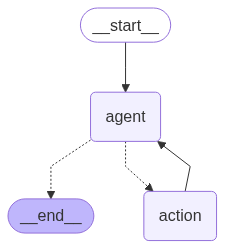

In [19]:
contextual_compression_graph_agent = get_graph_agent([ask_contextual_compression_llm_tool])
contextual_compression_graph_agent

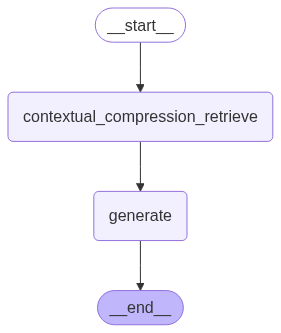

In [28]:
contextual_compression_graph

In [ ]:
import copy
import time
cc_golden_master_dataset = copy.deepcopy(golden_master_dataset)
cc_golden_master_dataset = generate_responses_for_golden_dataset(cc_golden_master_dataset, contextual_compression_graph_agent, pause_secs_between_each_run=2)

In [47]:
display_dataset_with_metadata(cc_golden_master_dataset).to_csv('../golden-masters/cc_golden_master_dataset.csv', index=False)
display_dataset_with_metadata(cc_golden_master_dataset)

,user_input,retrieved_contexts,reference_contexts,response,reference,synthesizer_name,tools_used,num_contexts
0,How is the Pell Grant award calculated for stu...,[StudentAid.gov Search Results for: Pell Grant...,"[non-term (includes clock-hour calendars), or ...",The Pell Grant award for students enrolled in ...,For students in subscription-based academic ca...,single_hop_specifc_query_synthesizer,"[None, StudentAid_Federal_Search]",5
1,Are veterinary clinical experiences allowed to...,[StudentAid.gov Search Results for: Are veteri...,[Inclusion of Clinical Work in a Standard Term...,Veterinary clinical experiences are not includ...,"Yes, veterinary clinical experiences may be in...",single_hop_specifc_query_synthesizer,"[None, StudentAid_Federal_Search]",5
2,Whaat are the condishuns under wich a program ...,[StudentAid.gov Search Results for: program me...,[Non-Term Characteristics A program that measu...,A program measuring progress in credit-hours i...,A program that measures progress in credit-hou...,single_hop_specifc_query_synthesizer,"[None, StudentAid_Federal_Search]",5
3,so like if a student gettin Pell Grant in a cl...,[that are established at the beginning of the ...,[both the credit or clock hours and the weeks ...,If a student receiving a Pell Grant in a clock...,if a student in a clock-hour or non-term credi...,single_hop_specifc_query_synthesizer,"[None, ask_contextual_compression_llm_tool]",3
4,how do disbursement timing rules for federal s...,[StudentAid.gov Search Results for: disburseme...,[<1-hop>\n\nboth the credit or clock hours and...,The disbursement timing rules for federal stud...,In clock-hour or non-term credit-hour programs...,multi_hop_abstract_query_synthesizer,"[None, StudentAid_Federal_Search]",10
5,What are the differences in disbursement timin...,[StudentAid.gov Search Results for: disburseme...,[<1-hop>\n\nboth the credit or clock hours and...,The search did not return specific details abo...,In clock-hour or non-term credit-hour programs...,multi_hop_abstract_query_synthesizer,"[None, StudentAid_Federal_Search]",5
6,How does the disbursement timing for federal s...,[StudentAid.gov Search Results for: disburseme...,[<1-hop>\n\nboth the credit or clock hours and...,The disbursement timing for federal student ai...,In clock-hour or non-term credit-hour programs...,multi_hop_abstract_query_synthesizer,"[None, StudentAid_Federal_Search]",15
7,How does the disbursement timing for federal s...,[StudentAid.gov Search Results for: disburseme...,[<1-hop>\n\nboth the credit or clock hours and...,The disbursement timing for federal student ai...,In standard clock-hour or non-term credit-hour...,multi_hop_abstract_query_synthesizer,"[None, StudentAid_Federal_Search]",15
8,How do the examples in Appendix A and Appendix...,[StudentAid.gov Search Results for: Appendix A...,[<1-hop>\n\nboth the credit or clock hours and...,The examples in Appendix A and Appendix B illu...,The examples in Appendix A illustrate the prin...,multi_hop_specific_query_synthesizer,"[None, StudentAid_Federal_Search, Student_Loan...",10
9,Wut are the disbursment timing rules for Title...,[StudentAid.gov Search Results for: disburseme...,[<1-hop>\n\nDisbursement Timing in Subscriptio...,The disbursement timing rules for Title IV fun...,For the first two subscription periods in a su...,multi_hop_specific_query_synthesizer,"[None, StudentAid_Federal_Search]",10


In [44]:
%%time
cc_result = run_ragas_evaluation(cc_golden_master_dataset, "Contextual Compression")

🧪 Running RAGAS evaluation for Contextual Compression


Evaluating:   0%|          | 0/96 [00:00<?, ?it/s]

2025-08-04 21:59:18,669 - ragas.executor - ERROR - Exception raised in Job[39]: AttributeError('StringIO' object has no attribute 'statements')
2025-08-04 22:04:21,020 - ragas.executor - ERROR - Exception raised in Job[55]: TimeoutError()
2025-08-04 22:04:35,772 - ragas.executor - ERROR - Exception raised in Job[63]: TimeoutError()
2025-08-04 22:05:23,995 - ragas.executor - ERROR - Exception raised in Job[95]: TimeoutError()


✅ Completed  RAGAS evaluation for Contextual Compression
CPU times: user 13.5 s, sys: 1.87 s, total: 15.3 s
Wall time: 7min 47s


In [76]:
cc_raw_stats_df = pd.DataFrame([extract_ragas_metrics(cc_result, 'gpt-4.1-mini')])
record_metrics_from_run('Contextual Compression', cc_raw_stats_df)

In [77]:
cc_raw_stats_df[columns]

,context_recall,faithfulness,factual_correctness,answer_relevancy,context_entity_recall,context_precision,answer_correctness,noise_sensitivity_relevant
0,0.343254,0.701244,0.41,0.797712,0.213148,0.451951,0.529945,0.286237


### Synthetic Data Generation using RAGAS using the Golden master (Multi Query Retriver)

2025-08-07 00:43:39,390 - src.agents.build_graph_agent - INFO - 🤖 Creating graph agent with 1 additional tools
2025-08-07 00:43:39,510 - src.agents.build_graph_agent - INFO - 🔧 Agent toolbelt configured with 5 total tools
2025-08-07 00:43:39,512 - src.agents.build_graph_agent - INFO - ✅ Agent graph compiled and ready


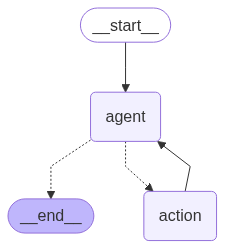

In [21]:
multi_query_graph_agent = get_graph_agent([ask_multi_query_llm_tool])
multi_query_graph_agent

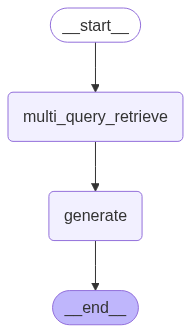

In [27]:
multi_query_graph

In [49]:
mq_golden_master_dataset = copy.deepcopy(golden_master_dataset)
mq_golden_master_dataset = generate_responses_for_golden_dataset(mq_golden_master_dataset, multi_query_graph_agent)

  0%|          | 0/12 [00:00<?, ?it/s]

2025-08-04 22:07:27,750 - src.agents.build_graph_agent - INFO - 🧠 LLM processing 1 messages
2025-08-04 22:07:28,748 - src.agents.build_graph_agent - INFO - 📝 LLM generated response with 0 characters
2025-08-04 22:07:28,751 - src.agents.build_graph_agent - INFO - 🔧 Agent requesting 1 tool calls
2025-08-04 22:07:28,758 - src.tools.tavily_tools - INFO - 🔍 [StudentAid Search] Searching for: Pell Grant award calculation for students enrolled in subscription-based academic calendars
2025-08-04 22:07:30,565 - src.tools.tavily_tools - INFO - 📚 [StudentAid Search] Found 3 results
2025-08-04 22:07:30,572 - src.agents.build_graph_agent - INFO - 🧠 LLM processing 3 messages
2025-08-04 22:07:32,620 - src.agents.build_graph_agent - INFO - 📝 LLM generated response with 576 characters
2025-08-04 22:07:32,623 - src.agents.build_graph_agent - INFO - ✅ Agent conversation complete, no more tool calls needed
2025-08-04 22:07:32,637 - src.agents.build_graph_agent - INFO - 🧠 LLM processing 1 messages
2025-08-

________________________________________________________________________________
[Memory] Calling src.core.graph_rag_functions.invoke_llm...
invoke_llm([ HumanMessage(content="\nYou are a helpful assistant who answers questions based on provided context. You must only use the provided context, and cannot use your own knowledge.\n\n### Question\nIf a student receiving a Pell Grant in a clock-hour or non-term credit-hour program finishes more weeks or hours faster than scheduled, how does that affect their Pell Grant disbursement? Do they get more Pell Grant money, or do the payment periods change?\n\n### Context\nAlthough a student9s completion of additional weeks or hours in a payment period has no effect on the scheduled\npayment periods for purposes of determining Pell Grant and TEACH Grant payment amounts, an undergraduate student\nwho a...)


2025-08-04 22:07:49,783 - src.core.graph_rag_functions - INFO - ✅ Generated response with 952 characters
2025-08-04 22:07:49,786 - src.agents.llm_tools_for_toolbelt - INFO - ✅ [Multi-Query Tool] Generated response with 9 contexts from expanded queries
2025-08-04 22:07:49,794 - src.agents.build_graph_agent - INFO - 🧠 LLM processing 3 messages


_______________________________________________________invoke_llm - 2.5s, 0.0min


2025-08-04 22:07:52,045 - src.agents.build_graph_agent - INFO - 📝 LLM generated response with 647 characters
2025-08-04 22:07:52,050 - src.agents.build_graph_agent - INFO - ✅ Agent conversation complete, no more tool calls needed
2025-08-04 22:07:52,071 - src.agents.build_graph_agent - INFO - 🧠 LLM processing 1 messages
2025-08-04 22:07:53,788 - src.agents.build_graph_agent - INFO - 📝 LLM generated response with 0 characters
2025-08-04 22:07:53,791 - src.agents.build_graph_agent - INFO - 🔧 Agent requesting 3 tool calls
2025-08-04 22:07:53,801 - src.tools.tavily_tools - INFO - 🔍 [StudentAid Search] Searching for: disbursement timing rules federal student aid clock-hour programs
2025-08-04 22:07:53,804 - src.tools.tavily_tools - INFO - 🔍 [StudentAid Search] Searching for: disbursement timing rules federal student aid non-term credit-hour programs
2025-08-04 22:07:53,805 - src.tools.tavily_tools - INFO - 🔍 [StudentAid Search] Searching for: disbursement timing rules federal student aid su

________________________________________________________________________________
[Memory] Calling src.core.graph_rag_functions.invoke_llm...
invoke_llm([ HumanMessage(content='\nYou are a helpful assistant who answers questions based on provided context. You must only use the provided context, and cannot use your own knowledge.\n\n### Question\nHow does the disbursement timing for federal student aid differ between standard clock-hour or non-term credit-hour programs and subscription-based programs, particularly regarding the requirements a student must meet before receiving subsequent disbursements?\n\n### Context\nterm, provided that the student is still making satisfactory academic progress under the school9s policy.\nDisbursement Timing in Clock-Hour, Non-Term, and Certain Nonstandard Term Programs\nA student who is enrolled in a credit...)


2025-08-04 22:08:33,913 - src.core.graph_rag_functions - INFO - ✅ Generated response with 1802 characters
2025-08-04 22:08:33,916 - src.agents.llm_tools_for_toolbelt - INFO - ✅ [Multi-Query Tool] Generated response with 7 contexts from expanded queries
2025-08-04 22:08:33,923 - src.agents.build_graph_agent - INFO - 🧠 LLM processing 3 messages


_______________________________________________________invoke_llm - 4.5s, 0.1min


2025-08-04 22:08:39,985 - src.agents.build_graph_agent - INFO - 📝 LLM generated response with 1936 characters
2025-08-04 22:08:39,988 - src.agents.build_graph_agent - INFO - ✅ Agent conversation complete, no more tool calls needed
2025-08-04 22:08:40,001 - src.agents.build_graph_agent - INFO - 🧠 LLM processing 1 messages
2025-08-04 22:08:42,857 - src.agents.build_graph_agent - INFO - 📝 LLM generated response with 0 characters
2025-08-04 22:08:42,860 - src.agents.build_graph_agent - INFO - 🔧 Agent requesting 2 tool calls
2025-08-04 22:08:42,865 - src.agents.llm_tools_for_toolbelt - INFO - 🔍 [Multi-Query Tool] Processing question: How do the examples in Appendix A and Appendix B illustrate the differences in disbursement timing a...
2025-08-04 22:08:42,872 - src.tools.tavily_tools - INFO - 🔍 [StudentAid Search] Searching for: Appendix A and Appendix B disbursement timing and eligibility requirements for clock-hour or non-term credit-hour programs versus subscription-based programs
2025-0

________________________________________________________________________________
[Memory] Calling src.core.graph_rag_functions.invoke_llm...
invoke_llm([ HumanMessage(content="\nYou are a helpful assistant who answers questions based on provided context. You must only use the provided context, and cannot use your own knowledge.\n\n### Question\nHow do the examples in Appendix A and Appendix B illustrate the differences in disbursement timing and eligibility requirements for students in clock-hour or non-term credit-hour programs versus subscription-based programs?\n\n### Context\nPayment Periods for Clock-Hour and Non-Term Programs\nFor all clock-hour programs and for credit-hour programs that do not have academic terms, payment periods are defined\nbased on a student9s successful completion of clock or credit hours and weeks of instruction...)


2025-08-04 22:08:47,626 - src.core.graph_rag_functions - INFO - ✅ Generated response with 1005 characters
2025-08-04 22:08:47,630 - src.agents.llm_tools_for_toolbelt - INFO - ✅ [Multi-Query Tool] Generated response with 7 contexts from expanded queries
2025-08-04 22:08:47,635 - src.agents.build_graph_agent - INFO - 🧠 LLM processing 4 messages


_______________________________________________________invoke_llm - 2.0s, 0.0min


2025-08-04 22:08:53,244 - src.agents.build_graph_agent - INFO - 📝 LLM generated response with 1659 characters
2025-08-04 22:08:53,247 - src.agents.build_graph_agent - INFO - ✅ Agent conversation complete, no more tool calls needed
2025-08-04 22:08:53,259 - src.agents.build_graph_agent - INFO - 🧠 LLM processing 1 messages
2025-08-04 22:08:54,752 - src.agents.build_graph_agent - INFO - 📝 LLM generated response with 0 characters
2025-08-04 22:08:54,755 - src.agents.build_graph_agent - INFO - 🔧 Agent requesting 2 tool calls
2025-08-04 22:08:54,765 - src.tools.tavily_tools - INFO - 🔍 [StudentAid Search] Searching for: Volume 8, Chapter 3 guidance for clinical work
2025-08-04 22:08:54,770 - src.tools.tavily_tools - INFO - 🔍 [StudentAid Search] Searching for: disbursement timing rules for Title IV funds in subscription-based programs
2025-08-04 22:08:56,576 - src.tools.tavily_tools - INFO - 📚 [StudentAid Search] Found 3 results
2025-08-04 22:08:57,171 - src.tools.tavily_tools - INFO - 📚 [Stud

In [50]:
display_dataset_with_metadata(mq_golden_master_dataset).to_csv('../golden-masters/mq_golden_master_dataset.csv', index=False)
display_dataset_with_metadata(mq_golden_master_dataset)

,user_input,retrieved_contexts,reference_contexts,response,reference,synthesizer_name,tools_used,num_contexts
0,How is the Pell Grant award calculated for stu...,[StudentAid.gov Search Results for: Pell Grant...,"[non-term (includes clock-hour calendars), or ...",The Pell Grant award for students enrolled in ...,For students in subscription-based academic ca...,single_hop_specifc_query_synthesizer,"[None, StudentAid_Federal_Search]",5
1,Are veterinary clinical experiences allowed to...,[StudentAid.gov Search Results for: Are veteri...,[Inclusion of Clinical Work in a Standard Term...,Veterinary clinical experiences are not includ...,"Yes, veterinary clinical experiences may be in...",single_hop_specifc_query_synthesizer,"[None, StudentAid_Federal_Search]",5
2,Whaat are the condishuns under wich a program ...,[StudentAid.gov Search Results for: program me...,[Non-Term Characteristics A program that measu...,A program measuring progress in credit-hours i...,A program that measures progress in credit-hou...,single_hop_specifc_query_synthesizer,"[None, StudentAid_Federal_Search]",5
3,so like if a student gettin Pell Grant in a cl...,[Although a student9s completion of additional...,[both the credit or clock hours and the weeks ...,If a student receiving a Pell Grant in a clock...,if a student in a clock-hour or non-term credi...,single_hop_specifc_query_synthesizer,"[None, ask_multi_query_llm_tool]",7
4,how do disbursement timing rules for federal s...,[StudentAid.gov Search Results for: disburseme...,[<1-hop>\n\nboth the credit or clock hours and...,The disbursement timing rules for federal stud...,In clock-hour or non-term credit-hour programs...,multi_hop_abstract_query_synthesizer,"[None, StudentAid_Federal_Search]",15
5,What are the differences in disbursement timin...,"[term, provided that the student is still maki...",[<1-hop>\n\nboth the credit or clock hours and...,The disbursement timing requirements for feder...,In clock-hour or non-term credit-hour programs...,multi_hop_abstract_query_synthesizer,"[None, ask_multi_query_llm_tool]",5
6,How does the disbursement timing for federal s...,[StudentAid.gov Search Results for: disburseme...,[<1-hop>\n\nboth the credit or clock hours and...,The disbursement timing for federal student ai...,In clock-hour or non-term credit-hour programs...,multi_hop_abstract_query_synthesizer,"[None, StudentAid_Federal_Search]",10
7,How does the disbursement timing for federal s...,"[term, provided that the student is still maki...",[<1-hop>\n\nboth the credit or clock hours and...,The disbursement timing for federal student ai...,In standard clock-hour or non-term credit-hour...,multi_hop_abstract_query_synthesizer,"[None, ask_multi_query_llm_tool]",7
8,How do the examples in Appendix A and Appendix...,[Payment Periods for Clock-Hour and Non-Term P...,[<1-hop>\n\nboth the credit or clock hours and...,The examples in Appendix A and Appendix B illu...,The examples in Appendix A illustrate the prin...,multi_hop_specific_query_synthesizer,"[None, StudentAid_Federal_Search, ask_multi_qu...",11
9,Wut are the disbursment timing rules for Title...,[StudentAid.gov Search Results for: disburseme...,[<1-hop>\n\nDisbursement Timing in Subscriptio...,The disbursement timing rules for Title IV fun...,For the first two subscription periods in a su...,multi_hop_specific_query_synthesizer,"[None, StudentAid_Federal_Search]",10


In [51]:
%%time
mq_result = run_ragas_evaluation(mq_golden_master_dataset, "Multi Query")

🧪 Running RAGAS evaluation for Multi Query


Evaluating:   0%|          | 0/96 [00:00<?, ?it/s]

2025-08-04 22:15:41,252 - ragas.executor - ERROR - Exception raised in Job[39]: TimeoutError()
2025-08-04 22:17:28,363 - ragas.executor - ERROR - Exception raised in Job[95]: TimeoutError()


✅ Completed  RAGAS evaluation for Multi Query
CPU times: user 14.1 s, sys: 2.19 s, total: 16.3 s
Wall time: 8min 11s


In [78]:
mq_raw_stats_df = pd.DataFrame([extract_ragas_metrics(mq_result, 'gpt-4.1-mini')])
record_metrics_from_run('MultiQuery', mq_raw_stats_df)

In [79]:
mq_raw_stats_df[columns]

,context_recall,faithfulness,factual_correctness,answer_relevancy,context_entity_recall,context_precision,answer_correctness,noise_sensitivity_relevant
0,0.500992,0.909593,0.373333,0.957734,0.25745,0.451584,0.522996,0.258004


### Synthetic Data Generation using RAGAS using the Golden master (Parent Document Retriever)

2025-08-07 00:43:45,322 - src.agents.build_graph_agent - INFO - 🤖 Creating graph agent with 1 additional tools
2025-08-07 00:43:45,446 - src.agents.build_graph_agent - INFO - 🔧 Agent toolbelt configured with 5 total tools
2025-08-07 00:43:45,448 - src.agents.build_graph_agent - INFO - ✅ Agent graph compiled and ready


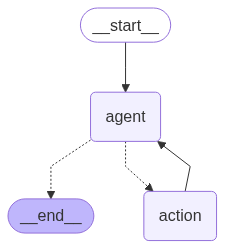

In [22]:
parent_document_graph_agent = get_graph_agent([ask_parent_document_llm_tool])
parent_document_graph_agent

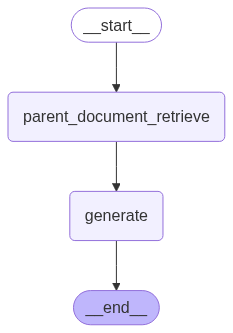

In [29]:
parent_document_graph

In [24]:
%%time
pd_golden_master_dataset = copy.deepcopy(golden_master_dataset)
pd_golden_master_dataset = generate_responses_for_golden_dataset(pd_golden_master_dataset, parent_document_graph_agent)

  0%|          | 0/12 [00:00<?, ?it/s]

2025-08-04 23:29:50,352 - src.agents.build_graph_agent - INFO - 🧠 LLM processing 1 messages
2025-08-04 23:29:51,068 - src.agents.build_graph_agent - INFO - 📝 LLM generated response with 0 characters
2025-08-04 23:29:51,072 - src.agents.build_graph_agent - INFO - 🔧 Agent requesting 1 tool calls
2025-08-04 23:29:51,061 - src.agents.llm_tools_for_toolbelt - INFO - 🔍 [Parent Document Tool] Processing question: How is the Pell Grant award calculated for students enrolled in subscription-based academic calendar...
2025-08-04 23:29:51,066 - src.core.graph_rag_functions - INFO - 🔍 [Parent Document] Retrieving docs for: How is the Pell Grant award calculated for students enrolled in subscription-based academic calendar...
2025-08-04 23:29:51,412 - src.core.graph_rag_functions - INFO - child_docs_with_scores: [(Document(metadata={'producer': 'GPL Ghostscript 10.00.0', 'creator': 'wkhtmltopdf 0.12.6', 'creationdate': "D:20250418114032Z00'00'", 'source': '../data/The_Federal_Pell_Grant_Program.pdf

CPU times: user 6.31 s, sys: 2.34 s, total: 8.65 s
Wall time: 1min 34s


In [25]:
display_dataset_with_metadata(pd_golden_master_dataset).to_csv('../golden-masters/pd_golden_master_dataset.csv', index=False)
display_dataset_with_metadata(pd_golden_master_dataset)

,user_input,retrieved_contexts,reference_contexts,response,reference,synthesizer_name,tools_used,num_contexts
0,How is the Pell Grant award calculated for stu...,[StudentAid.gov Search Results for: Pell Grant...,"[non-term (includes clock-hour calendars), or ...",The Pell Grant award for students enrolled in ...,For students in subscription-based academic ca...,single_hop_specifc_query_synthesizer,"[StudentAid_Federal_Search, ask_parent_documen...",5
1,Are veterinary clinical experiences allowed to...,[StudentAid.gov Search Results for: veterinary...,[Inclusion of Clinical Work in a Standard Term...,"Based on the information from StudentAid.gov, ...","Yes, veterinary clinical experiences may be in...",single_hop_specifc_query_synthesizer,[StudentAid_Federal_Search],5
2,Whaat are the condishuns under wich a program ...,[StudentAid.gov Search Results for: program me...,[Non-Term Characteristics A program that measu...,A program measuring progress in credit-hours i...,A program that measures progress in credit-hou...,single_hop_specifc_query_synthesizer,[StudentAid_Federal_Search],5
3,so like if a student gettin Pell Grant in a cl...,[StudentAid.gov Search Results for: Pell Grant...,[both the credit or clock hours and the weeks ...,If a student in a clock-hour or non-term credi...,if a student in a clock-hour or non-term credi...,single_hop_specifc_query_synthesizer,[StudentAid_Federal_Search],10
4,how do disbursement timing rules for federal s...,[StudentAid.gov Search Results for: disburseme...,[<1-hop>\n\nboth the credit or clock hours and...,The disbursement timing rules for federal stud...,In clock-hour or non-term credit-hour programs...,multi_hop_abstract_query_synthesizer,[StudentAid_Federal_Search],5
5,What are the differences in disbursement timin...,[StudentAid.gov Search Results for: disburseme...,[<1-hop>\n\nboth the credit or clock hours and...,The disbursement timing requirements for feder...,In clock-hour or non-term credit-hour programs...,multi_hop_abstract_query_synthesizer,[StudentAid_Federal_Search],10
6,How does the disbursement timing for federal s...,[StudentAid.gov Search Results for: disburseme...,[<1-hop>\n\nboth the credit or clock hours and...,For clock-hour or non-term credit-hour program...,In clock-hour or non-term credit-hour programs...,multi_hop_abstract_query_synthesizer,[StudentAid_Federal_Search],15
7,How does the disbursement timing for federal s...,[StudentAid.gov Search Results for: disburseme...,[<1-hop>\n\nboth the credit or clock hours and...,For standard clock-hour or non-term credit-hou...,In standard clock-hour or non-term credit-hour...,multi_hop_abstract_query_synthesizer,[StudentAid_Federal_Search],15
8,How do the examples in Appendix A and Appendix...,[],[<1-hop>\n\nboth the credit or clock hours and...,It appears there is a technical issue with ret...,The examples in Appendix A illustrate the prin...,multi_hop_specific_query_synthesizer,[ask_parent_document_llm_tool],0
9,Wut are the disbursment timing rules for Title...,[],[<1-hop>\n\nDisbursement Timing in Subscriptio...,It seems there is a technical issue with retri...,For the first two subscription periods in a su...,multi_hop_specific_query_synthesizer,[ask_parent_document_llm_tool],0


In [26]:
%%time
pd_result = run_ragas_evaluation(pd_golden_master_dataset, "Parent Document")

🧪 Running RAGAS evaluation for Parent Document


Evaluating:   0%|          | 0/96 [00:00<?, ?it/s]

2025-08-04 23:33:00,940 - ragas.executor - ERROR - Exception raised in Job[71]: ValueError(zero-size array to reduction operation maximum which has no identity)
2025-08-04 23:33:18,406 - ragas.executor - ERROR - Exception raised in Job[87]: ValueError(zero-size array to reduction operation maximum which has no identity)
2025-08-04 23:33:38,670 - ragas.executor - ERROR - Exception raised in Job[79]: ValueError(zero-size array to reduction operation maximum which has no identity)
2025-08-04 23:39:18,228 - ragas.executor - ERROR - Exception raised in Job[95]: TimeoutError()


✅ Completed  RAGAS evaluation for Parent Document
CPU times: user 12.7 s, sys: 1.95 s, total: 14.6 s
Wall time: 7min 55s


In [27]:
pd_raw_stats_df = pd.DataFrame([extract_ragas_metrics(pd_result, 'gpt-4.1-mini')])
record_metrics_from_run('Parent Document', pd_raw_stats_df)

In [30]:
pd_raw_stats_df[columns]

,context_recall,faithfulness,factual_correctness,answer_relevancy,context_entity_recall,context_precision,answer_correctness,noise_sensitivity_relevant
0,0.267857,0.653496,0.34,0.486543,0.137557,0.344034,0.452098,0.27408


In [31]:
collected_df = pd.read_csv('../metrics/ragas-evaluation-metrics.csv')
collected_df.tail()

,datetime,retriever,context_recall,faithfulness,factual_correctness,answer_relevancy,context_entity_recall,context_precision,answer_correctness,noise_sensitivity_relevant,comments
0,2025-08-04 22:35:20,Naive,0.636905,0.904951,0.533333,0.789092,0.255023,0.689220,0.595609,0.170794,"Better chunking, all required metrics"
1,2025-08-04 22:34:47,Contextual Compression,0.343254,0.701244,0.410000,0.797712,0.213148,0.451951,0.529945,0.286237,"Better chunking, all required metrics"
2,2025-08-04 22:35:00,MultiQuery,0.500992,0.909593,0.373333,0.957734,0.257450,0.451584,0.522996,0.258004,"Better chunking, all required metrics"
3,2025-08-04 22:35:37,Parent Document,0.229167,0.503199,0.389167,0.400112,0.069424,0.346412,0.464412,0.134706,"Better chunking, all required metrics"
4,2025-08-04 23:39:18,Parent Document,0.267857,0.653496,0.340000,0.486543,0.137557,0.344034,0.452098,0.274080,NaN


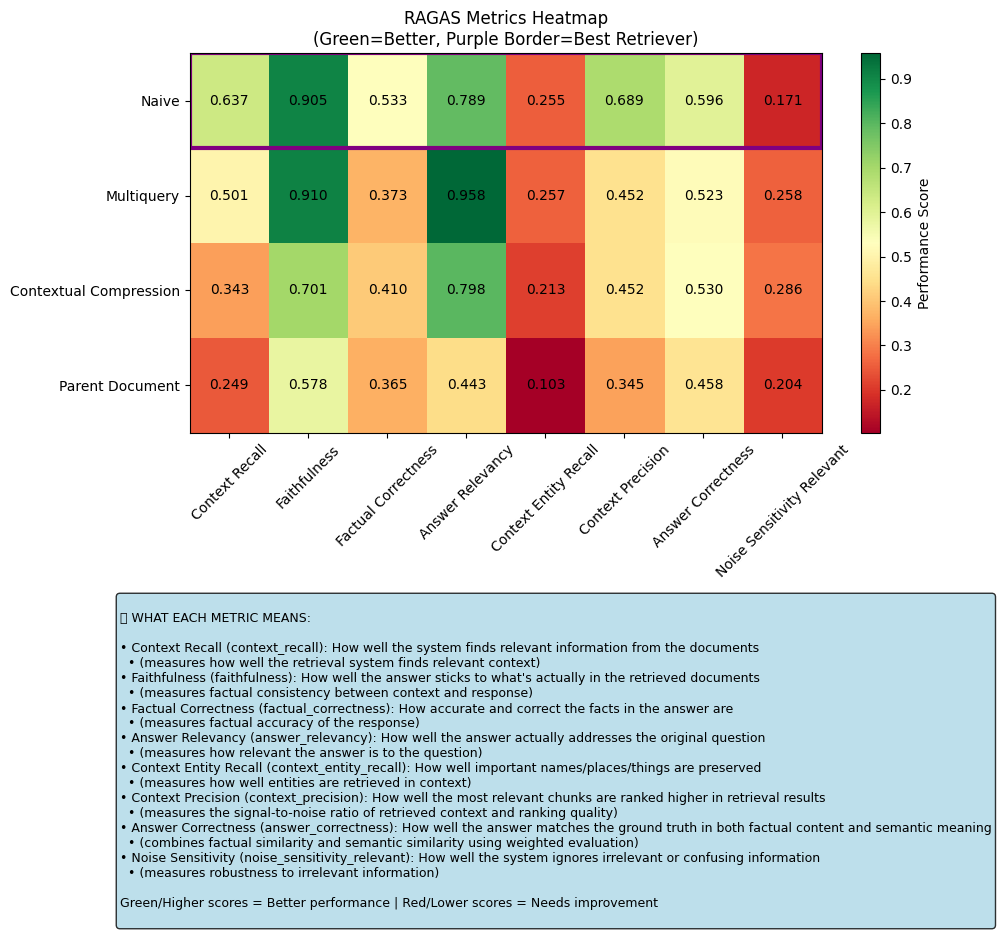

<module 'src.visualization.visualize_retriever_performance' from '/home/AIE7-Cert-Challenge/src/visualization/visualize_retriever_performance.py'>

In [35]:
import importlib
import src.visualization.visualize_retriever_performance
importlib.reload(src.visualization.visualize_retriever_performance)